In [1]:
mjolnir_path = "mjolnir"



In [2]:
# path to mjolnir code
import sys
sys.path.append(mjolnir_path) 

import pathlib
import re

import h5py
import imageio
import IPython.display as disp


#%matplotlib ipympl
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageDraw, ImageFont, ImageOps
# from pygifsicle import optimize

import hamarr as ham
import mjolnir_plot_helper as mph
from file_helpers import get_path_matching_regex, get_path_matching_regex_with_groups

In [3]:
from cycler import cycler


import pandas as pd

In [4]:
alfdmp = pathlib.Path("./alfprof/")

hldmp =  pathlib.Path("../HELIOS-orig/alfdbg/")

In [5]:
FIGSIZE_x = 10
FIGSIZE_y = 7
dpi = 100


FIGSIZE = (FIGSIZE_x, FIGSIZE_y)

## read THOR Alf output file list

In [6]:
def col2dct(regmatch):
    out = {}
    for d in regmatch:
        out[int(d['groups'][0])] = d['path']
    return out

init_profs = col2dct(get_path_matching_regex_with_groups(alfdmp, "tpprofile_init_1_(\d+).dat"))
plk_profs = col2dct(get_path_matching_regex_with_groups(alfdmp, "plkprofile_1_(\d+).dat"))
interp_profs = col2dct(get_path_matching_regex_with_groups(alfdmp, "tprofile_interp_1_(\d+).dat"))
opac_profs = col2dct(get_path_matching_regex_with_groups(alfdmp, "opacprofile_1_(\d+).dat"))

deltacolmass_profs = col2dct(get_path_matching_regex_with_groups(alfdmp, "deltacolmassprofile_1_(\d+).dat"))
meanmolmass_profs = col2dct(get_path_matching_regex_with_groups(alfdmp, "meanmolmassprofile_1_(\d+).dat"))
opt_depth_profs = col2dct(get_path_matching_regex_with_groups(alfdmp, "opt_depthprofile_1_(\d+).dat"))
trans_band_profs = col2dct(get_path_matching_regex_with_groups(alfdmp, "trans_band_profile_1_(\d+).dat"))
singscat_band_profs = col2dct(get_path_matching_regex_with_groups(alfdmp, "single_scat_band_profile_1_(\d+).dat"))



In [7]:
interp_profs

{0: PosixPath('alfprof/tprofile_interp_1_0.dat'),
 1: PosixPath('alfprof/tprofile_interp_1_1.dat'),
 10: PosixPath('alfprof/tprofile_interp_1_10.dat'),
 100: PosixPath('alfprof/tprofile_interp_1_100.dat'),
 1000: PosixPath('alfprof/tprofile_interp_1_1000.dat'),
 1001: PosixPath('alfprof/tprofile_interp_1_1001.dat'),
 1002: PosixPath('alfprof/tprofile_interp_1_1002.dat'),
 1003: PosixPath('alfprof/tprofile_interp_1_1003.dat'),
 1004: PosixPath('alfprof/tprofile_interp_1_1004.dat'),
 1005: PosixPath('alfprof/tprofile_interp_1_1005.dat'),
 1006: PosixPath('alfprof/tprofile_interp_1_1006.dat'),
 1007: PosixPath('alfprof/tprofile_interp_1_1007.dat'),
 1008: PosixPath('alfprof/tprofile_interp_1_1008.dat'),
 1009: PosixPath('alfprof/tprofile_interp_1_1009.dat'),
 101: PosixPath('alfprof/tprofile_interp_1_101.dat'),
 1010: PosixPath('alfprof/tprofile_interp_1_1010.dat'),
 1011: PosixPath('alfprof/tprofile_interp_1_1011.dat'),
 1012: PosixPath('alfprof/tprofile_interp_1_1012.dat'),
 1013: Posix

In [8]:
col_idx = 2000
init_table = pd.read_csv(init_profs[col_idx], sep='\s+', header=None, skiprows=2, names=['T','P'])
interp_table = pd.read_csv(interp_profs[col_idx], sep='\s+', header=None, skiprows=2, names=['T'])


In [9]:
interp_table

,T
BOA,1795.830
0,1798.570
1,1803.730
2,1808.470
3,1813.370
4,1818.930
5,1822.710
6,1820.690
7,1812.230
8,1799.700


In [10]:
tpfile = hldmp / f"alfprof_{col_idx}" /  f"alfprof_{col_idx}_tp.dat" 

hl_tp =  pd.read_csv(tpfile, sep='\s+', header=0, skiprows=1) #, names = [
    # "layer",   "temp[K]",          "press.[10^-6bar]",        "altitude[cm]",         "height.of.layer[cm]",    "conv.unstable?[1:yes,0:no]",    "conv.lapse-rate?[1:yes,0:no]"
        #"layer",   "temp",          "press",        "altitude",         "height.of.layer",    "conv.unstable",    "conv.lapse-rate"
#])

hl_tp['press'] = hl_tp['press.[10^-6bar]']*1e-6
hl_tp['temp'] = hl_tp['temp.[K]']

hl_tp

,layer,temp.[K],press.[10^-6bar],altitude[cm],height.of.layer[cm],"conv.unstable?[1:yes,0:no]","conv.lapse-rate?[1:yes,0:no]",pl.eff.temp.[K],press,temp
0,BOA,1798.570,8.782670e+07,0.0,not_avail.,not_calculated,not_calculated,1435.92,87.826700,1798.570
1,0,1801.870,7.498650e+07,2157780.0,4.31557e+06,not_calculated,not_calculated,NaN,74.986500,1801.870
2,1,1808.100,5.466330e+07,6481100.0,4.33106e+06,not_calculated,not_calculated,NaN,54.663300,1808.100
3,2,1814.520,3.984810e+07,10820100.0,4.34697e+06,not_calculated,not_calculated,NaN,39.848100,1814.520
4,3,1820.810,2.904830e+07,15174800.0,4.36247e+06,not_calculated,not_calculated,NaN,29.048300,1820.810
5,4,1821.110,2.117550e+07,19537900.0,4.36356e+06,not_calculated,not_calculated,NaN,21.175500,1821.110
6,5,1811.180,1.543640e+07,23889600.0,4.33992e+06,not_calculated,not_calculated,NaN,15.436400,1811.180
7,6,1794.490,1.125270e+07,28209600.0,4.30004e+06,not_calculated,not_calculated,NaN,11.252700,1794.490
8,7,1775.630,8.202970e+06,32487100.0,4.25494e+06,not_calculated,not_calculated,NaN,8.202970,1775.630
9,8,1755.470,5.979760e+06,36717900.0,4.20666e+06,not_calculated,not_calculated,NaN,5.979760,1755.470


In [11]:
hl_tp_lay = hl_tp.loc[1:, : ]
hl_tp_lay

,layer,temp.[K],press.[10^-6bar],altitude[cm],height.of.layer[cm],"conv.unstable?[1:yes,0:no]","conv.lapse-rate?[1:yes,0:no]",pl.eff.temp.[K],press,temp
1,0,1801.870,7.498650e+07,2157780.0,4.31557e+06,not_calculated,not_calculated,NaN,74.986500,1801.870
2,1,1808.100,5.466330e+07,6481100.0,4.33106e+06,not_calculated,not_calculated,NaN,54.663300,1808.100
3,2,1814.520,3.984810e+07,10820100.0,4.34697e+06,not_calculated,not_calculated,NaN,39.848100,1814.520
4,3,1820.810,2.904830e+07,15174800.0,4.36247e+06,not_calculated,not_calculated,NaN,29.048300,1820.810
5,4,1821.110,2.117550e+07,19537900.0,4.36356e+06,not_calculated,not_calculated,NaN,21.175500,1821.110
6,5,1811.180,1.543640e+07,23889600.0,4.33992e+06,not_calculated,not_calculated,NaN,15.436400,1811.180
7,6,1794.490,1.125270e+07,28209600.0,4.30004e+06,not_calculated,not_calculated,NaN,11.252700,1794.490
8,7,1775.630,8.202970e+06,32487100.0,4.25494e+06,not_calculated,not_calculated,NaN,8.202970,1775.630
9,8,1755.470,5.979760e+06,36717900.0,4.20666e+06,not_calculated,not_calculated,NaN,5.979760,1755.470
10,9,1739.030,4.359090e+06,40904900.0,4.16731e+06,not_calculated,not_calculated,NaN,4.359090,1739.030


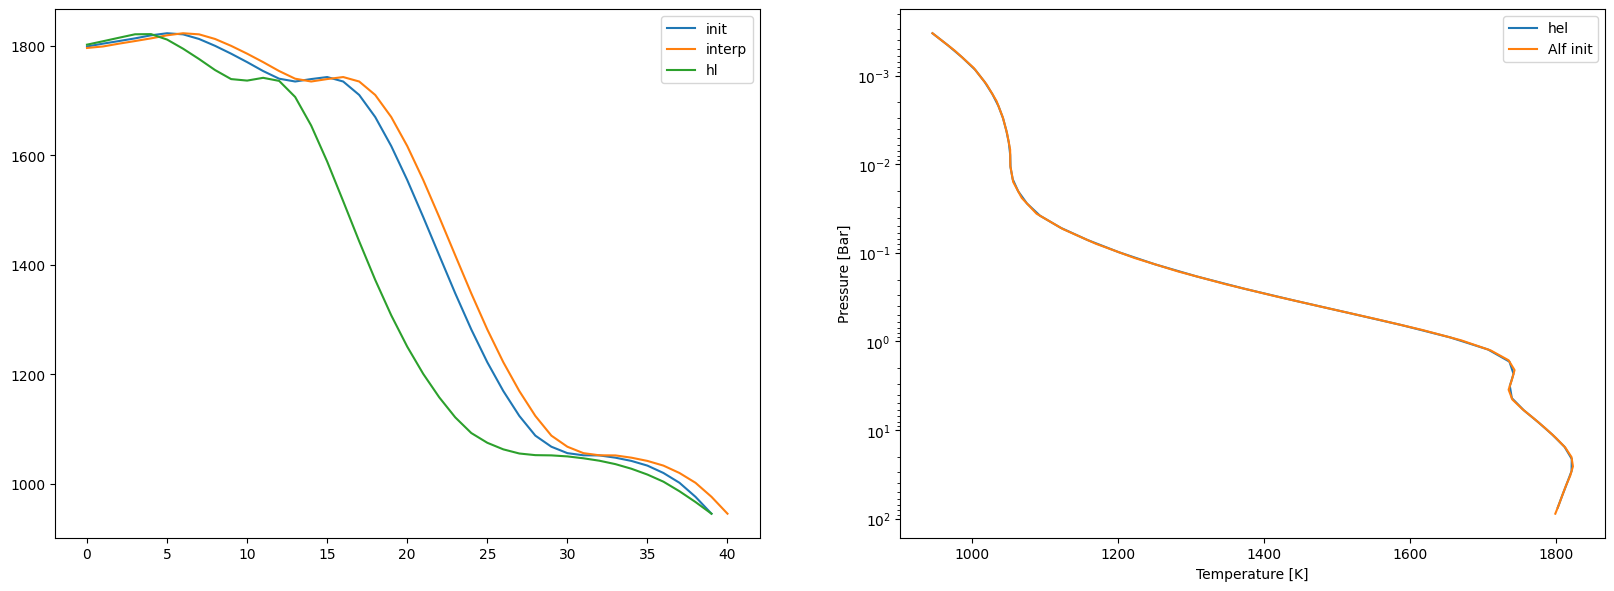

In [35]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(2*FIGSIZE_x, FIGSIZE_y), dpi=dpi)

ax1.plot(init_table['T'].values, label="init")
ax1.plot(interp_table['T'].values, label="interp")
ax1.plot(hl_tp_lay['temp'].values, label="hl")
ax1.legend()

ax2.plot(hl_tp_lay['temp'], hl_tp_lay['press'], label='hel')

ax2.plot(init_table['T'], init_table['P'], label='Alf init')

ax2.set(yscale='log', ylabel="Pressure [Bar]",
       xscale='linear', xlabel="Temperature [K]")
ax2.invert_yaxis()

ax2.legend()

#ax2.plot()


offset above between helios and thor is because of different height grids. gets corrected in pressure diplay

# plank function

In [13]:
hlpkfile = hldmp / f"alfprof_{col_idx}" /  f"alfprof_{col_idx}_planck_cent.dat" 

hl_pk =  pd.read_csv(hlpkfile, sep='\s+', header=0, skiprows=2)



In [36]:
hl_pk;

In [37]:
th_plk_table = pd.read_csv(plk_profs[col_idx], sep='\s+', header=0)

In [38]:
th_plk_table;


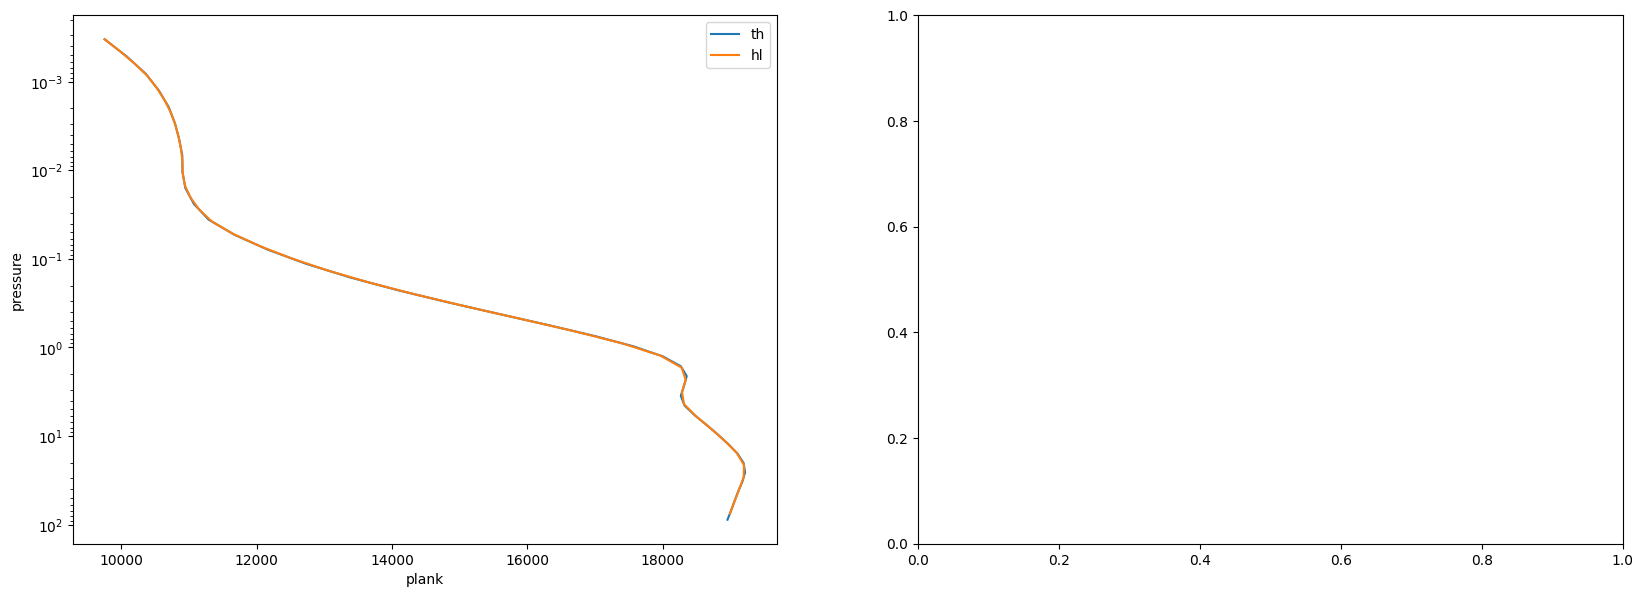

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(2*FIGSIZE_x, FIGSIZE_y), dpi=dpi)

hl_pk_table = hl_pk.loc[:,'B_lay[0]':'B_lay[39]'].values

th_pk_table = th_plk_table.loc[:,'layer[0]':'layer[39]'].values

nbin = 34
ax1.plot(  th_pk_table[nbin,:], init_table['P'], label='th')
ax1.plot( hl_pk_table[nbin,:]*1e-1,hl_tp_lay['press'], label='hl')

ax1.set(xscale='linear', xlabel='plank')
ax1.set(yscale='log', ylabel='pressure')
ax1.invert_yaxis()

ax1.legend()

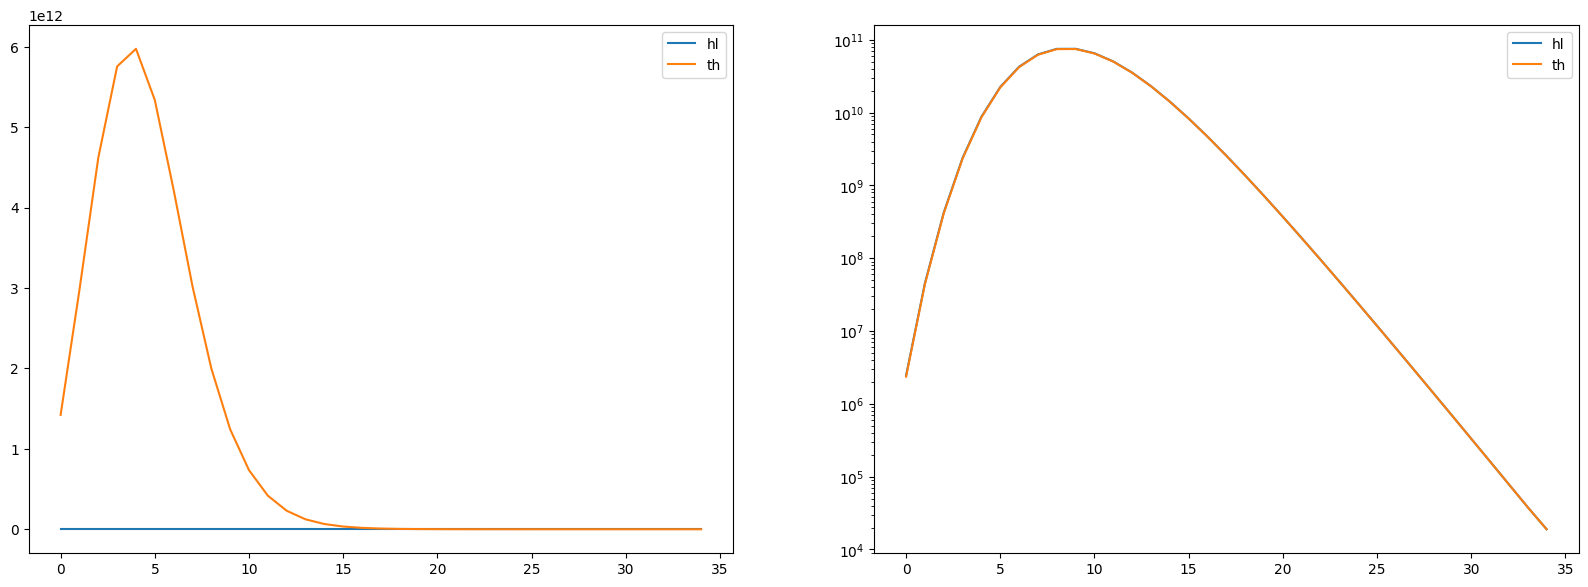

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(2*FIGSIZE_x, FIGSIZE_y), dpi=dpi)

hl_toa = hl_pk['Planck_T_star']*1e-1
th_toa = th_plk_table['layer[TOA]']

ax1.plot(hl_toa, label='hl')
ax1.plot(th_toa, label='th')

ax1.legend()

hl_boa = hl_pk['Planck_T_intern']*1e-1
th_boa = th_plk_table['layer[BOA]']

ax2.plot(hl_boa, label='hl')
ax2.plot(th_boa, label='th')
ax2.set(yscale='log')
ax2.legend()

# opacities

In [19]:
th_opac_table = pd.read_csv(opac_profs[col_idx], sep='\s+', header=0)

In [20]:
hlopacfile = hldmp / f"alfprof_{col_idx}" /  f"alfprof_{col_idx}_opacities.dat" 

hl_opac =  pd.read_csv(hlopacfile, sep='\s+', header=0, skiprows=2)

In [21]:
hl_opac;

In [22]:
th_opac_table;

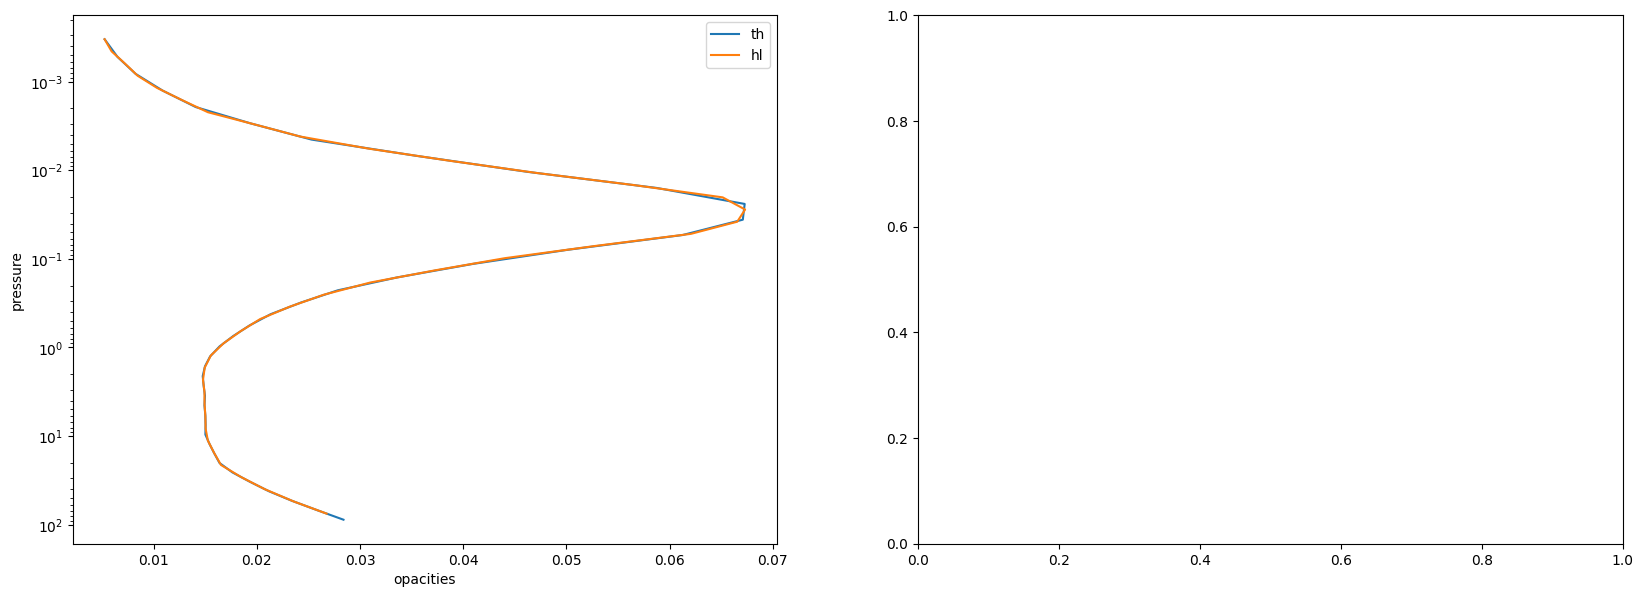

In [23]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(2*FIGSIZE_x, FIGSIZE_y), dpi=dpi)

hl_oc_table = hl_opac.loc[:,'opac_lay[0]':'opac_lay[39]'].values

th_oc_table = th_opac_table.loc[:,'layer[0]':'layer[39]'].values

nbin = 34
ax1.plot(  th_oc_table[nbin,:], init_table['P'], label='th')
ax1.plot( hl_oc_table[nbin,:]*1e-1,hl_tp_lay['press'], label='hl')

ax1.set(xscale='linear', xlabel='opacities')
ax1.set(yscale='log', ylabel='pressure')
ax1.invert_yaxis()

ax1.legend()



# mean molecular weight

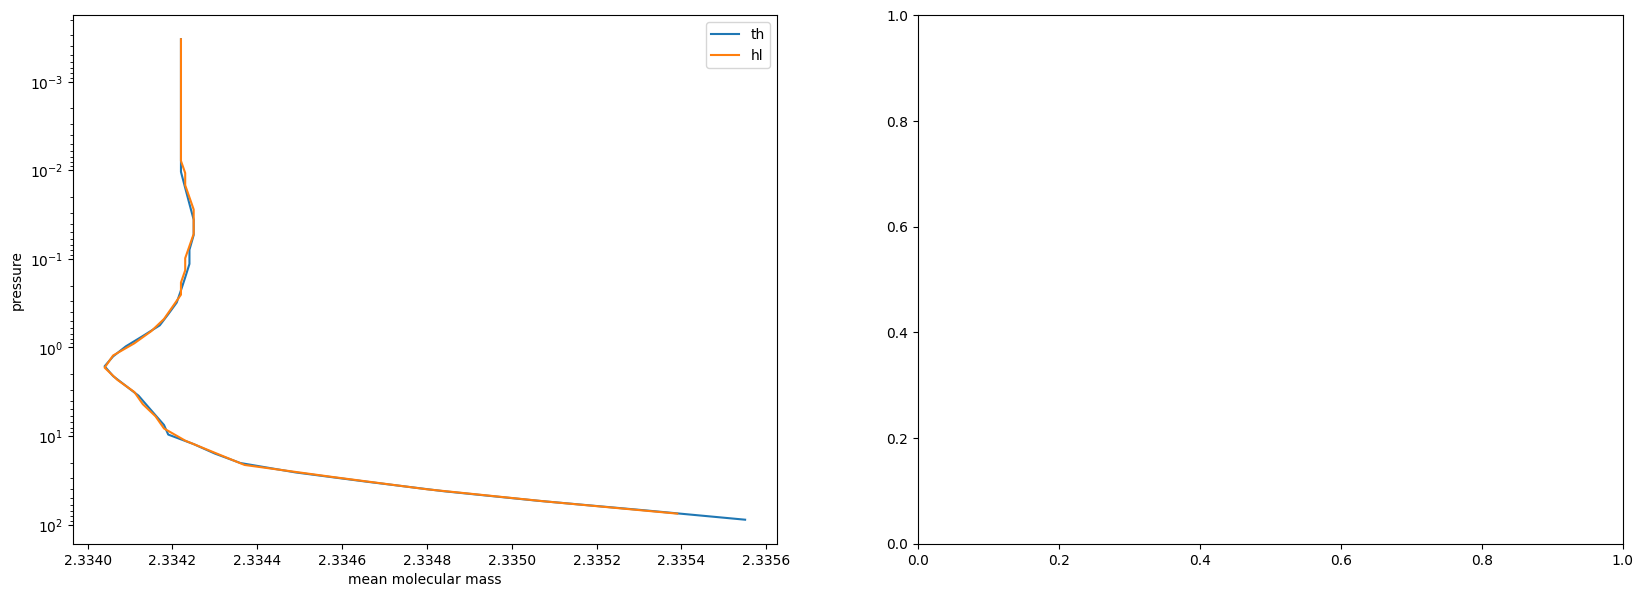

In [24]:
th_mmm_table = pd.read_csv(meanmolmass_profs[col_idx], sep='\s+', header=0)

hlmmmfile = hldmp / f"alfprof_{col_idx}" /  f"alfprof_{col_idx}_colmass_mu_cp_kappa_entropy.dat" 

hl_mmm =  pd.read_csv(hlmmmfile, sep='\s+', header=None, skiprows=2)

hl_mmm_table = hl_mmm[3].values

th_mmm_table = th_mmm_table['meanmolmass'].values

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(2*FIGSIZE_x, FIGSIZE_y), dpi=dpi)

ax1.plot(  th_mmm_table, init_table['P'], label='th')
ax1.plot( hl_mmm_table,hl_tp_lay['press'], label='hl')

ax1.set(xscale='linear', xlabel='mean molecular mass')
ax1.set(yscale='log', ylabel='pressure')
ax1.invert_yaxis()

ax1.legend()

# delta col mass

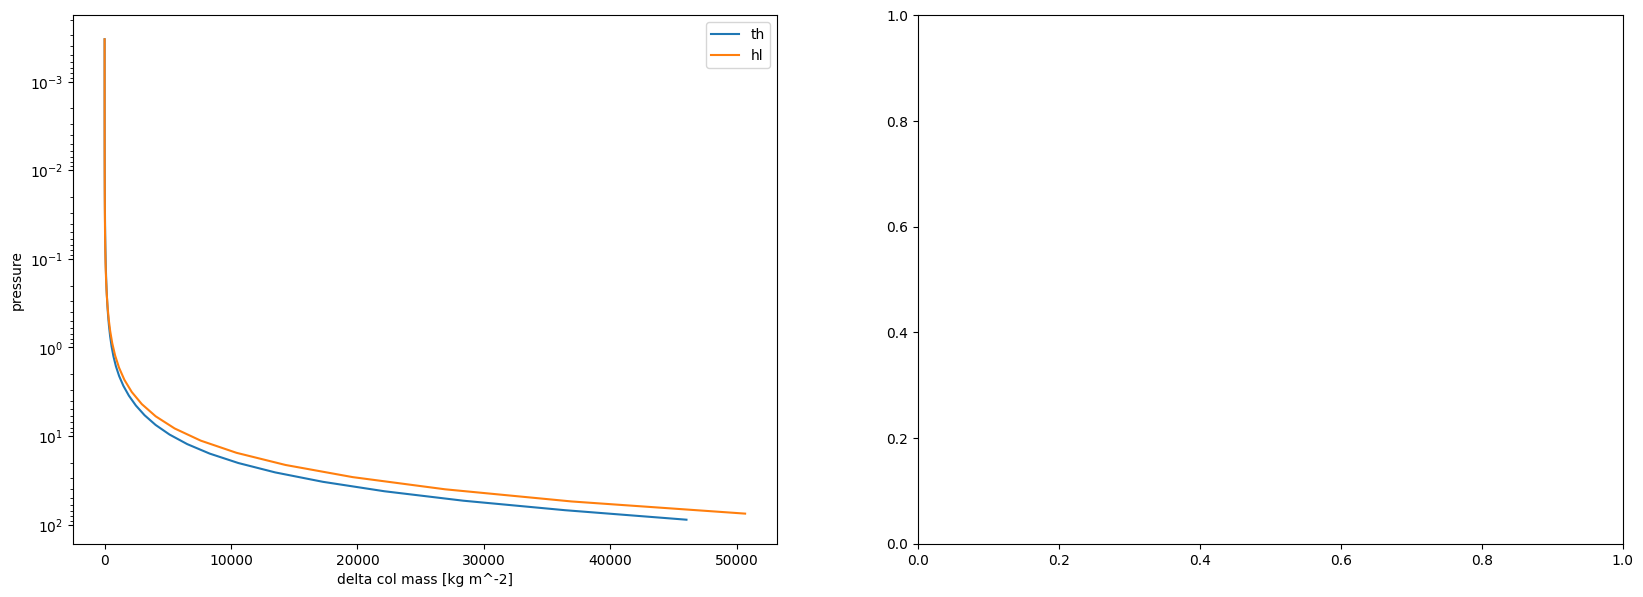

In [25]:
th_dcm_table = pd.read_csv(deltacolmass_profs[col_idx], sep='\s+', header=0)
# reuse above file from MMM that contains also delta_col_mass

hl_dcm_table = hl_mmm[2].values*10
th_dcm_table = th_dcm_table['delta_col_mass'].values

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(2*FIGSIZE_x, FIGSIZE_y), dpi=dpi)

ax1.plot(  th_dcm_table, init_table['P'], label='th')
ax1.plot( hl_dcm_table,hl_tp_lay['press'], label='hl')

ax1.set(xscale='linear', xlabel='delta col mass [kg m^-2]')
ax1.set(yscale='log', ylabel='pressure')
ax1.invert_yaxis()

ax1.legend()

# optical depth - delta tau 

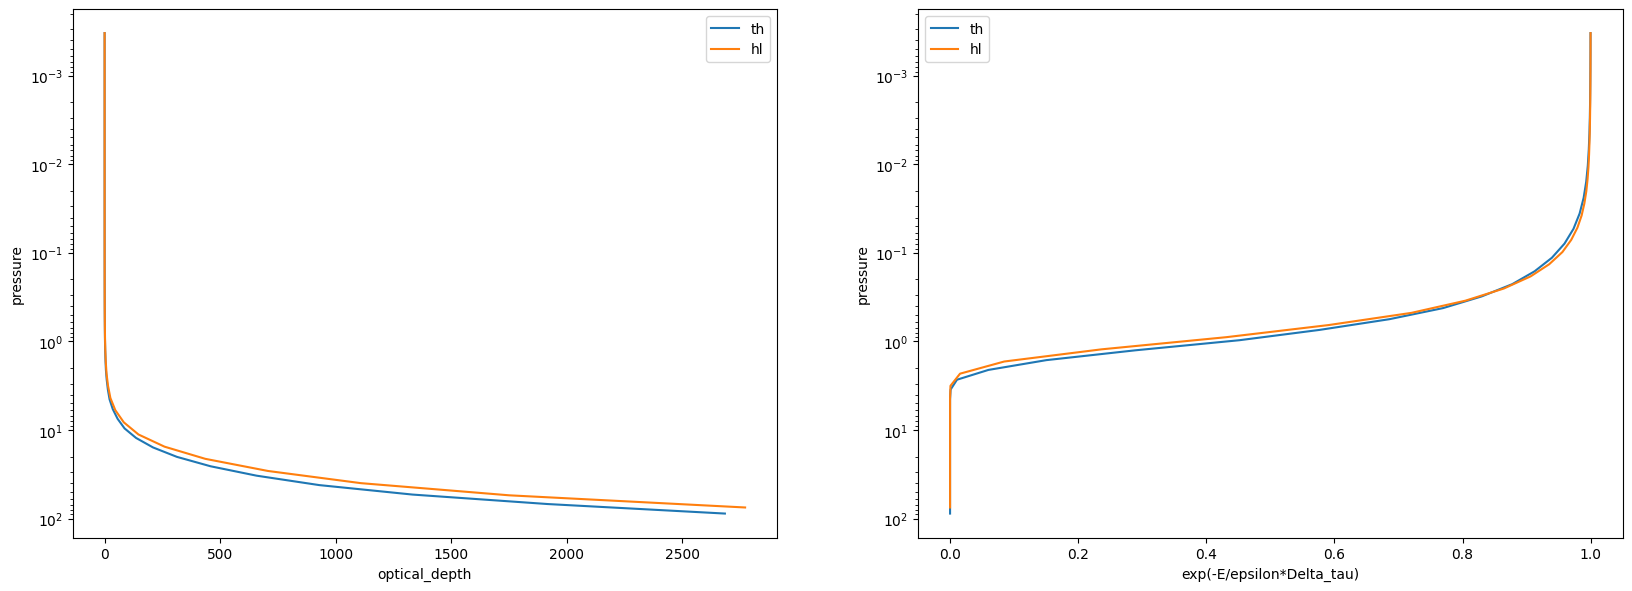

In [26]:
th_optd_table = pd.read_csv(opt_depth_profs[col_idx], sep='\s+', header=0)

hloptdfile = hldmp / f"alfprof_{col_idx}" /  f"alfprof_{col_idx}_optdepth.dat" 

hl_optd =  pd.read_csv(hloptdfile, sep='\s+', header=0, skiprows=1)

hl_optd_table = hl_optd.loc[:,'delta_tau_lay[0]':'delta_tau_lay[39]'].values

th_optd_table = th_optd_table.loc[:,'layer[0]':'layer[39]'].values

nbin = 15

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(2*FIGSIZE_x, FIGSIZE_y), dpi=dpi)


ax1.plot(  th_optd_table[nbin,:], init_table['P'], label='th')
ax1.plot( hl_optd_table[nbin,:],hl_tp_lay['press'], label='hl')

ax1.set(xscale='linear', xlabel='optical_depth')
ax1.set(yscale='log', ylabel='pressure')
ax1.invert_yaxis()

ax1.legend()

ax2.plot(  np.exp(-0.5*th_optd_table[nbin,:]), init_table['P'], label='th')
ax2.plot( np.exp(-0.5*hl_optd_table[nbin,:]),hl_tp_lay['press'], label='hl')

ax2.set(xscale='linear', xlabel='exp(-E/epsilon*Delta_tau)')
ax2.set(yscale='log', ylabel='pressure')
ax2.invert_yaxis()

ax2.legend()

# transmission 

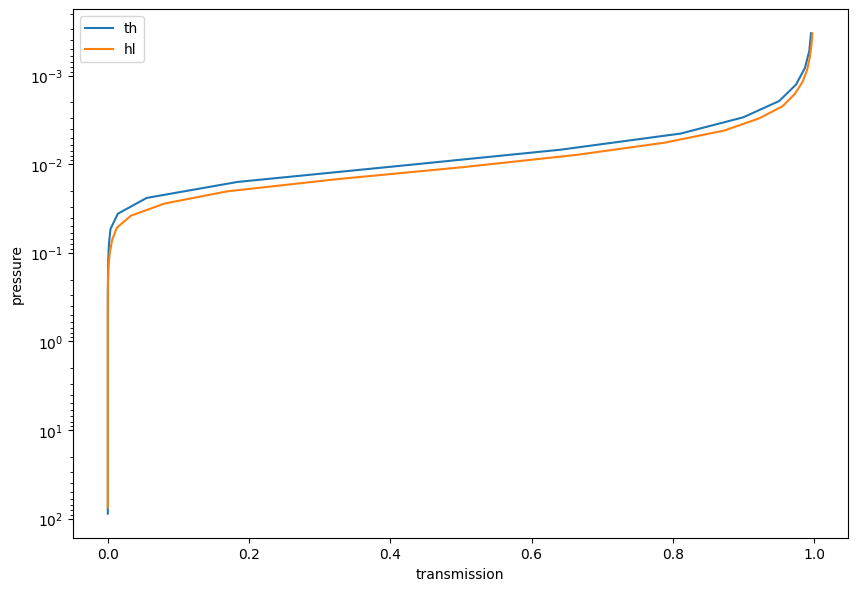

In [27]:
th_trans_table = pd.read_csv(trans_band_profs[col_idx], sep='\s+', header=0)

hltransfile = hldmp / f"alfprof_{col_idx}" /  f"alfprof_{col_idx}_transmission.dat" 

hl_trans =  pd.read_csv(hltransfile, sep='\s+', header=0, skiprows=1)

hl_trans_table = hl_trans.loc[:,'transm_lay[0]':'transm_lay[39]'].values

th_trans_table = th_trans_table.loc[:,'layer[0]':'layer[39]'].values

nbin = 34

fig, ax = plt.subplots(1, 1, figsize=(1*FIGSIZE_x, FIGSIZE_y), dpi=dpi)


ax.plot(  th_trans_table[nbin,:], init_table['P'], label='th')
ax.plot( hl_trans_table[nbin,:],hl_tp_lay['press'], label='hl')

ax.set(xscale='linear', xlabel='transmission')
ax.set(yscale='log', ylabel='pressure')
ax.invert_yaxis()

ax.legend()

# single scat albedo

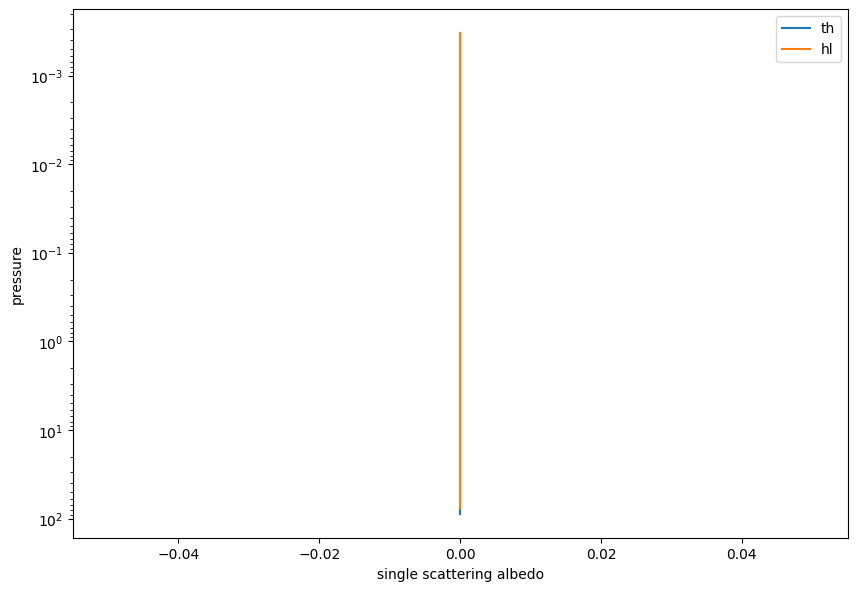

In [28]:
th_singscat_table = pd.read_csv(singscat_band_profs[col_idx], sep='\s+', header=0)

hlw0file = hldmp / f"alfprof_{col_idx}" /  f"alfprof_{col_idx}_w0.dat" 

hl_w0 =  pd.read_csv(hlw0file, sep='\s+', header=0, skiprows=1)

hl_w0_table = hl_w0.loc[:,'w0_lay[0]':'w0_lay[39]'].values

th_w0_table = th_singscat_table.loc[:,'layer[0]':'layer[39]'].values

nbin = 30

fig, ax = plt.subplots(1, 1, figsize=(1*FIGSIZE_x, FIGSIZE_y), dpi=dpi)


ax.plot(  th_w0_table[nbin,:], init_table['P'], label='th')
ax.plot( hl_w0_table[nbin,:],hl_tp_lay['press'], label='hl')

ax.set(xscale='linear', xlabel='single scattering albedo')
ax.set(yscale='log', ylabel='pressure')
ax.invert_yaxis()

ax.legend()